# **Khushdev Pandit**
# **Roll no: 2020211** 
# *Assignment Question-1*

#

# **Q1 Part-1**
* ##### (5 points) Report the estimated intrinsic camera parameters, i.e., focal length(s), skew parameter and principal point along with error estimates if available.

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['figure.facecolor'] = 'white'


images = glob.glob('Chess_Images/*.jpg')
print("Number of images: ", len(images))

Number of images:  28


In [3]:
def find_world_and_image_points(images, checkerboard_size=(5,5)):
    # Arrays to store object points and image points from all the images.
    objects_points = []     # 3d points in real world space
    image_points = []       # 2d points in image plane.

    # Prepare world coordinate for 3D-object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0), and so on
    objp = np.zeros((1, checkerboard_size[0]*checkerboard_size[1], 3), np.float32)
    objp[0,:,:2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)
    
    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
    # Step through the list and search for chessboard corners
    cnt = 0
    for fname in images:
        cnt += 1
        print("Processing Image-" + str(cnt), ": ", fname)
        
        # Read the image, invert it and convert to grayscale
        img = cv2.imread(fname)
        inverted_img = np.array(255 - img, dtype=np.uint8)
        gray_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2GRAY)

        # Locate the chessboard corners in the chessboard image
        ret, corners = cv2.findChessboardCorners(image=gray_img, patternSize=checkerboard_size, 
                flags=cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

        # If corner is found, add object points, image points
        if ret == True:
            print("Corners found")
            # Refined chessboard corners for better accuracy
            corners_refined = cv2.cornerSubPix(gray_img, corners, (11,11), (-1,-1), criteria)

            # print('Sum of Difference in corner and refined corner:', (corners_refined-corners).sum())
            objects_points.append(objp)
            image_points.append(corners_refined)

            # Draw the corners
            corners_img = cv2.drawChessboardCorners(img, checkerboard_size, corners_refined, ret)
            for corner in corners_refined.squeeze():
                coord = (int(corner[0]), int(corner[1]))
                cv2.circle(img=corners_img, center=coord, radius=33, color=(255, 0, 0), thickness=15)

            plt.imsave("Chess_Corners/" + str(fname.split('\\')[-1].split('.')[0] + '.png'), corners_img)

    return objects_points, image_points

In [4]:
# Locate the chessboard corners in the chessboard image
checkerboard_size=(5,5)
objects_points, image_points = find_world_and_image_points(images, checkerboard_size)

Processing Image-1 :  Chess_Images\IMG_20230402_131411.jpg
Corners found
Processing Image-2 :  Chess_Images\IMG_20230402_131417.jpg
Corners found
Processing Image-3 :  Chess_Images\IMG_20230402_131422.jpg
Corners found
Processing Image-4 :  Chess_Images\IMG_20230402_131426.jpg
Corners found
Processing Image-5 :  Chess_Images\IMG_20230402_131436.jpg
Corners found
Processing Image-6 :  Chess_Images\IMG_20230402_131443.jpg
Corners found
Processing Image-7 :  Chess_Images\IMG_20230402_131452.jpg
Corners found
Processing Image-8 :  Chess_Images\IMG_20230402_131457.jpg
Corners found
Processing Image-9 :  Chess_Images\IMG_20230402_131500.jpg
Corners found
Processing Image-10 :  Chess_Images\IMG_20230402_131506.jpg
Corners found
Processing Image-11 :  Chess_Images\IMG_20230402_131512.jpg
Corners found
Processing Image-12 :  Chess_Images\IMG_20230402_131536.jpg
Corners found
Processing Image-13 :  Chess_Images\IMG_20230402_131614.jpg
Corners found
Processing Image-14 :  Chess_Images\IMG_2023040

In [5]:
img = cv2.imread(images[0])
retVal, cameraInternalMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objects_points, image_points, img.shape[:2],None,None)

print("ret : \n", retVal, "\n")
print("Internal Camera matrix : \n", cameraInternalMatrix, "\n")
print("dist : \n", distCoeffs, "\n")

print("Focal length :")
print("fx = ", cameraInternalMatrix[0,0])
print("fy = ", cameraInternalMatrix[1,1])
print("\nPrincipal point :")
print("cx = ", cameraInternalMatrix[0,2])
print("cy = ", cameraInternalMatrix[1,2])
print("\nSkew paramerer:")
print("s = ", cameraInternalMatrix[0,1])

ret : 
 2.9029874512404708 

Internal Camera matrix : 
 [[3.59083306e+03 0.00000000e+00 2.18587381e+03]
 [0.00000000e+00 3.61682218e+03 1.15224849e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

dist : 
 [[ 0.35342384 -3.46665081 -0.02122771 -0.01373224  5.72094171]] 

Focal length :
fx =  3590.833064903618
fy =  3616.8221776162177

Principal point :
cx =  2185.873809980998
cy =  1152.2484917564666

Skew paramerer:
s =  0.0


In [10]:
np.savez('calibration.npz', mtx=cameraInternalMatrix, dist=distCoeffs, rvecs=rvecs, tvecs=tvecs)

In [11]:
data = np.load('calibration.npz')
cameraInternalMatrix1 = data['mtx']
distCoeffs1 = data['dist']
rvecs1 = data['rvecs']
tvecs1 = data['tvecs']

# **Q1 Part-2**
* ##### (5 points) Report the estimated extrinsic camera parameters, i.e., rotation matrix and translation vector for each of the selected images.

In [6]:
print("Length of Translation Vector: ", len(tvecs))
print("Length of Rotation Vector: ", len(rvecs))
print("Translation Vector Shape: ", np.array(tvecs).shape)
print("Rotation Vector Shape: ", np.array(rvecs).shape)

Length of Translation Vector:  28
Length of Rotation Vector:  28
Translation Vector Shape:  (28, 3, 1)
Rotation Vector Shape:  (28, 3, 1)


In [7]:
for i in range(len(tvecs)):
    tranlation_vector = tvecs[i].squeeze()
    Rotation_matrix, Jacobian_matrix = cv2.Rodrigues(rvecs[i])
    print("Translation Vector for Image-" + str(i+1) + ": ", tranlation_vector)
    print("Rotation Matrix for Image-" + str(i+1) + ": \n", Rotation_matrix)
    print()

Translation Vector for Image-1:  [-2.08240623 -1.5133837  12.7989665 ]
Rotation Matrix for Image-1: 
 [[ 0.99942363 -0.0127346  -0.0314681 ]
 [ 0.0128625   0.9999098   0.00386529]
 [ 0.03141603 -0.00426782  0.99949728]]

Translation Vector for Image-2:  [-1.18808451 -1.2212676  15.41348057]
Rotation Matrix for Image-2: 
 [[-0.04698458 -0.88119303  0.47041608]
 [ 0.99726649 -0.01449519  0.07245307]
 [-0.05702637  0.47253437  0.87946533]]

Translation Vector for Image-3:  [-4.01634327 -0.91581462 18.73782882]
Rotation Matrix for Image-3: 
 [[ 0.90025277 -0.246029    0.35918614]
 [ 0.31149245  0.94038066 -0.13658942]
 [-0.30416674  0.23484878  0.92321647]]

Translation Vector for Image-4:  [-2.94285076 -2.70809673 15.83170226]
Rotation Matrix for Image-4: 
 [[ 0.96448887 -0.19012082  0.18334475]
 [ 0.17959713  0.98106169  0.07254542]
 [-0.1936649  -0.03704106  0.98036823]]

Translation Vector for Image-5:  [-1.18142315 -1.85368307 14.60135143]
Rotation Matrix for Image-5: 
 [[ 0.78279454 

# **Q1 Part-3**
* ##### (5 points) Report the estimated radial distortion coefficients. Use the radial distortion coefficients to undistort 5 of the raw images and include them in your report. Observe how straight lines at the corner of the images change upon application of the distortion coefficients. Comment briefly on this observation.

In [8]:
print("Lens distortion coefficients :")
print("k1 = ", distCoeffs[0,0])
print("k2 = ", distCoeffs[0,1])
print("p1 = ", distCoeffs[0,2])
print("p2 = ", distCoeffs[0,3])
print("k3 = ", distCoeffs[0,4])

Lens distortion coefficients :
k1 =  0.35342384286946465
k2 =  -3.466650807348555
p1 =  -0.02122771187422184
p2 =  -0.013732237993644918
k3 =  5.720941706225883


In [17]:
images_5 = np.random.choice(images, 5, replace=False)

for image in images_5:
    img = cv2.imread(image)

    # perform the undistortion operation on the image
    undistorted = cv2.undistort(img, cameraInternalMatrix, distCoeffs)

    # Save the original and undistorted images 
    plt.imsave("Undistorted_Image/Raw_image__" + str(image.split('\\')[-1].split('.')[0] + '.png'), img)
    plt.imsave("Undistorted_Image/Undistorted_image__" + str(image.split('\\')[-1].split('.')[0] + '.png'), undistorted)

# **Q1 Part-4**
* ##### (5 points) Compute and report the re-projection error using the intrinsic and ex-trinsic camera parameters for each of the 25 selected images. Plot the error using a bar chart. Also report the mean and standard deviation of the re-projection error.

In [37]:
# Arrays to store object points and image points from all the images.
objects_points = []     
image_points = []     

# Prepare world coordinate for 3D-object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0), and so on
objp = np.zeros((1, checkerboard_size[0]*checkerboard_size[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

errors = []
i = 0
print("Images Processed:")

for image_name in tqdm(images):
    img = cv2.imread(image_name)
    inverted_img = np.array(255 - img, dtype=np.uint8)
    gray_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(image=gray_img, patternSize=checkerboard_size, 
            flags=cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        corners_refined = cv2.cornerSubPix(gray_img, corners, (11,11), (-1,-1), criteria)
        objects_points.append(objp)
        image_points.append(corners_refined)
        
        # project 3D points to image plane
        reproj_imgage_points, _ = cv2.projectPoints(objp, rvecs[i], tvecs[i], cameraInternalMatrix, distCoeffs)
        # calculate error
        error = cv2.norm(corners_refined, reproj_imgage_points, cv2.NORM_L2)/len(reproj_imgage_points)
        errors.append(error)
        i += 1

100%|██████████| 28/28 [00:47<00:00,  1.71s/it]


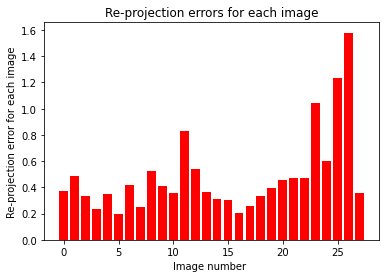

In [60]:
plt.bar(np.arange(len(errors)), errors, 0.8, color='r')
plt.title('Re-projection errors for each image')
plt.xlabel('Image number ')
plt.ylabel('Re-projection error for each image');

In [61]:
# calculate mean and standard deviation of re-projection error
mean_error = np.mean(errors)
std_dev_error = np.std(errors)

print('Mean Re-projection error for all Images:', mean_error)
print('Standard deviation of Re-projection error for all Images:', std_dev_error)

Mean Re-projection error for all Images: 0.48873697481323536
Standard deviation of Re-projection error for all Images: 0.31341515953042837
